In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [111]:
selected_features = [
    'Unemployment Rate', 
    'Three Month T Bill Rate', 
    'Six Month T Bill Rate', 
    'BBB Rate', 
    'SP500 Index', 
    'CPI', 
    'Fed Rate',
    'JPY/USD Spot Rate'
]

In [112]:
data = pd.read_csv('VIX_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data_clean = data
data_clean.fillna(data_clean.mean(), inplace=True)


# Unlagged

In [113]:
X = data_clean[selected_features]
y = data_clean['VIX']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [115]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_updated = np.sqrt(mse)
rmse_updated

2.6493080715726576

In [116]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [117]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

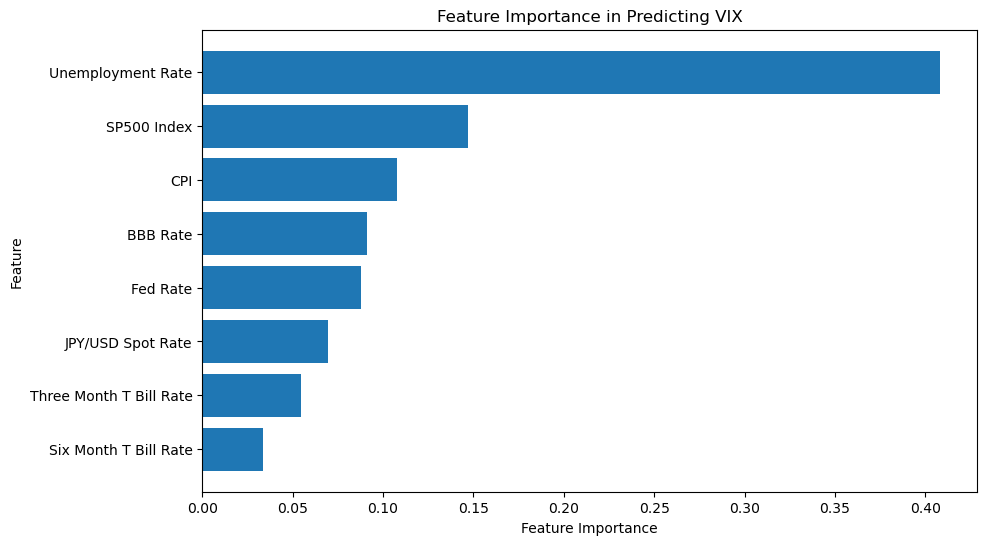

In [118]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

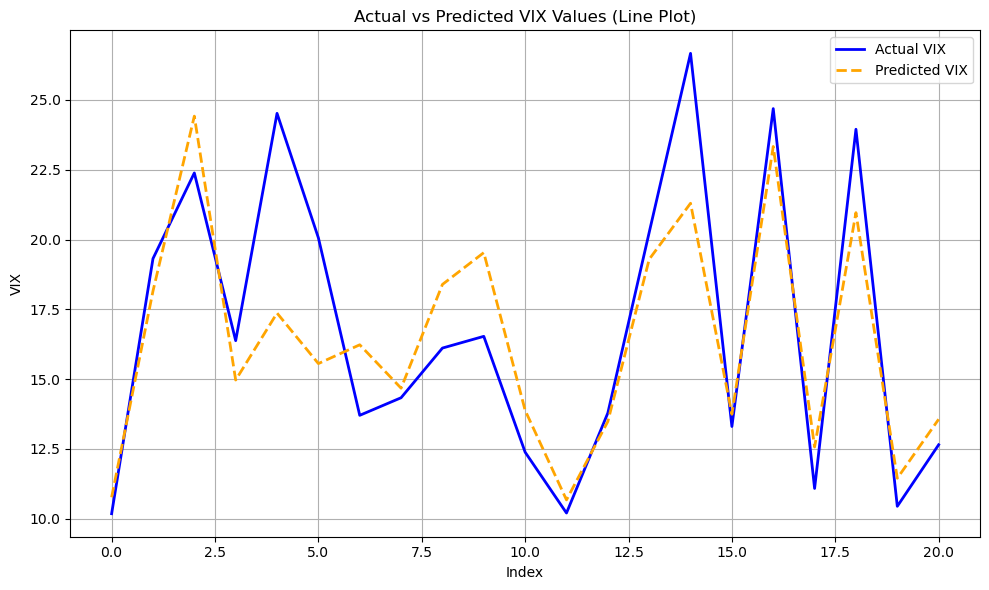

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual VIX', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted VIX', color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Index')
plt.ylabel('VIX')
plt.title('Actual vs Predicted VIX Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Lagged

In [120]:
data_lagged_VIX = data_clean
data_lagged_VIX['Lagged VIX'] = data_clean['VIX'].shift(-1)


In [121]:
data_lagged_VIX = data_lagged_VIX.dropna(subset=['Lagged VIX'])
data_lagged_VIX

,Date,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,...,USD INDEX High,USD INDEX Low,USD INDEX Close,USD INDEX Adj Close,VXN Open,VXN High,VXN Low,VXN Close,VXN Adj Close,Lagged VIX
0,2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,1928.210,16.530,...,87.129997,84.470001,86.879997,86.879997,18.260000,31.170000,15.310000,15.810000,15.810000,13.330
1,2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,13.330,...,88.440002,86.879997,88.360001,88.360001,15.740000,17.180000,13.480000,14.740000,14.740000,15.155
2,2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,15.155,...,90.330002,87.629997,90.269997,90.269997,14.740000,24.080000,14.300000,19.639999,19.639999,19.455
3,2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,19.455,...,95.480003,90.330002,94.800003,94.800003,19.730000,23.700001,16.389999,21.590000,21.590000,13.300
4,2015-04-01,5.4,236.222,0.02,0.09,1.94,0.12,3.41,2097.290,13.300,...,99.989998,94.400002,94.599998,94.599998,17.360001,18.639999,13.510000,16.510000,16.510000,13.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2024-03-01,3.8,312.230,5.24,5.11,4.21,5.33,5.58,5161.335,13.785,...,104.730003,102.360001,104.550003,104.550003,17.209999,20.309999,7.120000,16.660000,16.660000,15.745
98,2024-04-01,3.9,313.207,5.24,5.15,4.54,5.33,5.84,5108.065,15.745,...,106.519997,103.879997,106.220001,106.220001,17.590000,23.340000,16.340000,18.430000,18.430000,12.920
99,2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,12.920,...,106.489998,104.080002,104.669998,104.669998,20.150000,20.230000,14.670000,16.700001,16.700001,12.645
100,2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,12.645,...,106.129997,103.989998,105.870003,105.870003,16.830000,17.980000,6.480000,16.240000,16.240000,13.190


In [122]:
X_lagged = data_lagged_VIX[selected_features]
y_lagged = data_lagged_VIX['Lagged VIX']
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_lagged, test_size=0.2, random_state=42)

In [123]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [124]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_updated = np.sqrt(mse)
rmse_updated

2.718838660458681

In [125]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

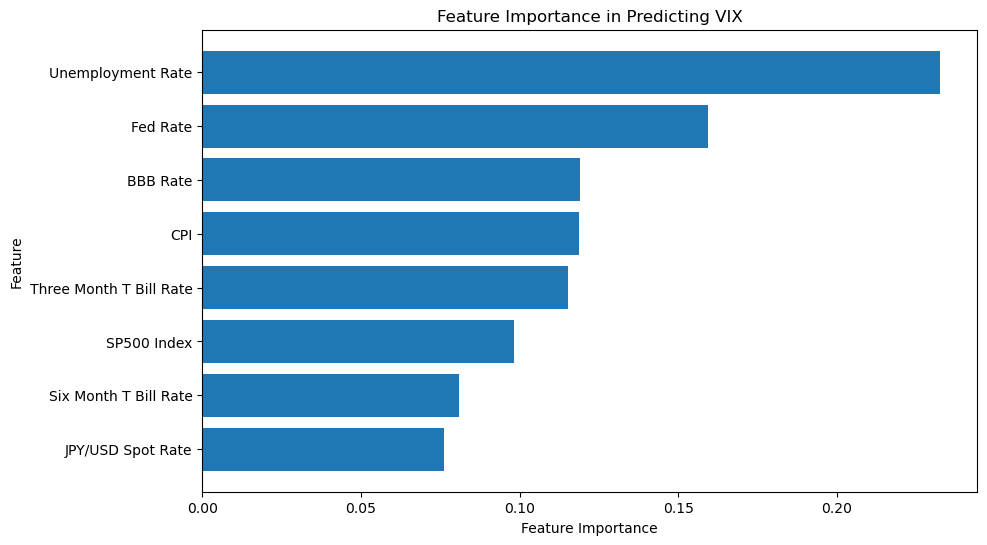

In [126]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

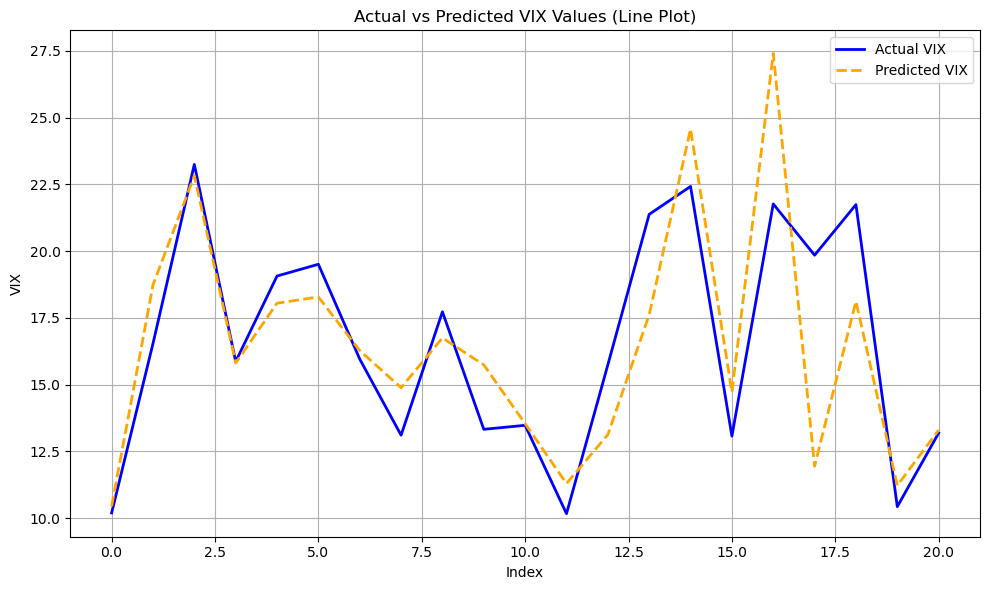

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual VIX', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted VIX', color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Index')
plt.ylabel('VIX')
plt.title('Actual vs Predicted VIX Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()